In [86]:
import numpy as np, matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib as mpl
from astropy.io import ascii as asc

FULL_PATH = '/Users/kaitlynshin/GoogleDrive/NASA_Summer2015/'
CUTOFF_SIGMA = 4.0
CUTOFF_MASS = 6.0

In [87]:
# reading in data generated by EBV_corrections.py
corr_tbl = asc.read(FULL_PATH+'Main_Sequence/mainseq_corrections_tbl.txt',guess=False,
                Reader=asc.FixedWidthTwoLine)
zspec0 = np.array(corr_tbl['zspec0'])
no_spectra  = np.where((zspec0 <= 0) | (zspec0 > 9))[0]
yes_spectra = np.where((zspec0 >= 0) & (zspec0 < 9))[0]

stlr_mass = np.array(corr_tbl['stlr_mass'])
filts = np.array(corr_tbl['filt'])
obs_sfr = np.array(corr_tbl['obs_sfr'])
dust_corr_factor = np.array(corr_tbl['dust_corr_factor'])
filt_corr_factor = np.array(corr_tbl['filt_corr_factor'])
nii_ha_corr_factor = np.array(corr_tbl['nii_ha_corr_factor'])


# defining useful data structs for plotting
filtarr = np.array(['NB704,NB711', 'NB816', 'NB921', 'NB973'])
markarr = np.array(['o', '^', 'D', '*'])
sizearr = np.array([6.0, 6.0, 6.0, 9.0])**2

# defining an approximate redshift array for plot visualization
z_arr0 = np.array([7045.0, 7126.0, 8152.0, 9193.0, 9749.0])/6563.0 - 1
z_arr0 = np.around(z_arr0, 2)
z_arr  = np.array(z_arr0, dtype='|S9')
z_arr[0] = ",".join(z_arr[:2])
z_arr = np.delete(z_arr, 1)
z_arr  = np.array([x+'0' if len(x)==3 else x for x in z_arr])

# defining a flux sigma and mass cutoff
good_sig_iis = np.where((corr_tbl['flux_sigma'] >= CUTOFF_SIGMA) & (stlr_mass >= CUTOFF_MASS))[0]

corr_sfrs = obs_sfr+filt_corr_factor+nii_ha_corr_factor+dust_corr_factor

In [88]:
smass0 = np.array(corr_tbl['stlr_mass'])[good_sig_iis]

zspec0 = np.array(corr_tbl['zspec0'])[good_sig_iis]
badz_iis = np.array([x for x in range(len(zspec0)) if zspec0[x] < 0 or zspec0[x] > 9])
filt_lambda_list = {'NB704':7045.0, 'NB711':7126.0, 'NB816':8152.0, 'NB921':9193.0, 'NB973':9749.0}
ffs = filts[good_sig_iis]
for ff in filt_lambda_list.keys():
    badf_match = np.where(ffs[badz_iis] == ff)[0]
    zspec0[badz_iis[badf_match]] = (filt_lambda_list[ff]/6562.8) - 1

data00 = np.vstack([smass0, zspec0]).T

sfrs00 = corr_sfrs[good_sig_iis]

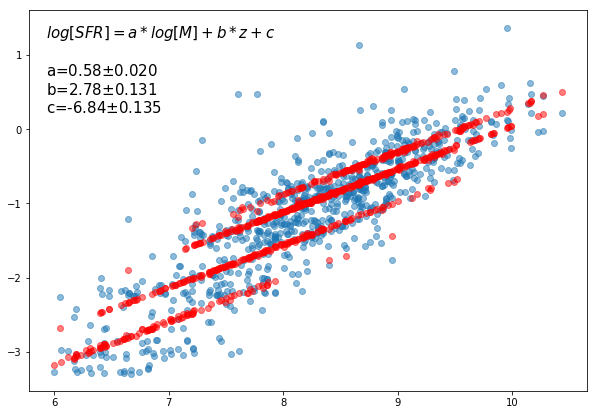

In [90]:
# assuming sfr = a*m + b*z + c
eqn0 = r'$log[SFR] = a*log[M] + b*z + c$'
def func0(data, a, b, c):
    return a*data[:,0] + b*data[:,1] + c

f, ax = plt.subplots()
params, pcov = optimize.curve_fit(func0, data00, sfrs00, method='lm')
perr = np.sqrt(np.diag(pcov))
ax.plot(stlr_mass[good_sig_iis], corr_sfrs[good_sig_iis], 'o', alpha=0.5)
ax.plot(smass0, func0(data00, *params), 'ro', alpha=0.5)
ax.text(0.03,0.97,eqn0+
         '\n\na='+'{:.2f}'.format(params[0])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[0])+
         '\nb='+'{:.2f}'.format(params[1])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[1])+
         '\nc='+'{:.2f}'.format(params[2])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[2]),
         transform=ax.transAxes,fontsize=15,ha='left',va='top')

f.set_size_inches(10,7)

### plotting rms of SFR-M* fit vs M* in 0.5 bins

In [93]:
# defining an approximate redshift array for plot visualization
z_arr0 = np.array([7045.0, 7126.0, 8152.0, 9193.0, 9749.0])/6563.0 - 1
z_arr0 = np.around(z_arr0, 2)
z_arr  = np.array(z_arr0, dtype='|S9')
z_arr[0] = ",".join(z_arr[:2])
z_arr = np.delete(z_arr, 1)
z_arr  = np.array([x+'0' if len(x)==3 else x for x in z_arr])


smass_all = np.array(corr_tbl['stlr_mass'])

zspec_all = np.array(corr_tbl['zspec0'])
badz_iis = np.array([x for x in range(len(zspec_all)) if zspec_all[x] < 0 or zspec_all[x] > 9])
filt_lambda_list = {'NB704':7045.0, 'NB711':7126.0, 'NB816':8152.0, 'NB921':9193.0, 'NB973':9749.0}
for ff in filt_lambda_list.keys():
    badf_match = np.where(filts[badz_iis] == ff)[0]
    zspec_all[badz_iis[badf_match]] = (filt_lambda_list[ff]/6562.8) - 1

data_all = np.vstack([smass_all, zspec_all]).T

In [95]:
filts99 = filts[good_sig_iis]
markarr = np.array(['o', '^', 'D', '*'])
sizearr = np.array([6.0, 6.0, 6.0, 9.0])**2

mbins0 = np.arange(6.25, 10.75, .5)
bin_ii = np.digitize(smass0, mbins0)

sigma = 0.4779
sigma = 0.3558
sigma = 0.2984
sigma = 0.3373
sigma = 0.389
sigma = 0.388
sigma = 0.3244
sigma = 0.4175
sigma = 0.3244


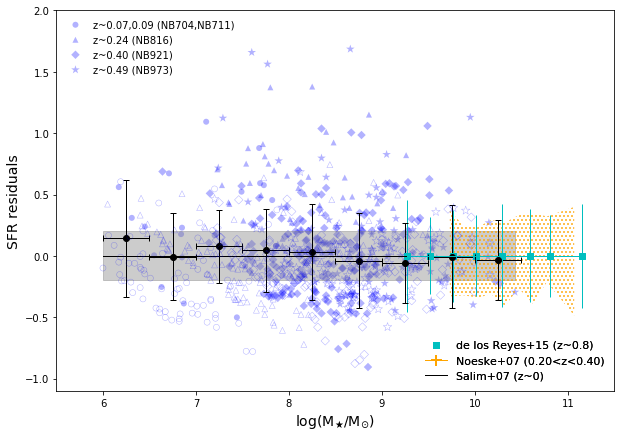

In [96]:
f, ax = plt.subplots()

sfrs_resid = corr_sfrs - func0(data_all, *params)
ax.plot(smass0, np.zeros(len(smass0)), 'k-')
for ff,mm,ll,size,avg_z in zip(['NB7', 'NB816', 'NB921', 'NB973'], markarr, 
                       ['NB704,NB711', 'NB816', 'NB921', 'NB973'], sizearr, z_arr):
    if 'NB7' in ff:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff[:3] in filts[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff[:3] in filts[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])
    else:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff==filts[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff==filts[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])


    ax.scatter(stlr_mass[yes_spectra][filt_index_y],
               sfrs_resid[yes_spectra][filt_index_y], marker=mm,
               facecolors='blue', edgecolors='none', alpha=0.3,
               label='z~'+np.str(avg_z)+' ('+ll+')', s=size)

    ax.scatter(stlr_mass[no_spectra][filt_index_n], 
                    sfrs_resid[no_spectra][filt_index_n],
                    marker=mm, facecolors='none', edgecolors='blue', alpha=0.3, 
                    linewidth=0.5, zorder=3, s=size)

for i in range(len(mbins0)):
    bin_match = np.where(bin_ii == i)[0]
    ax.plot(mbins0[i], np.mean(sfrs_resid[bin_match]), 'ko')
    ax.errorbar(mbins0[i], np.mean(sfrs_resid[bin_match]), xerr=0.25, yerr=np.std(sfrs_resid[bin_match]),
                capsize=3, color='k')
    print 'sigma =',str(np.round(np.std(sfrs_resid[bin_match]), 4))

# salim07
xarr = np.arange(min(smass0), max(smass0)+0.01, 0.01)
plt.fill_between(xarr, -np.array([0.2]*len(xarr)), np.array([0.2]*len(xarr)), color='gray', alpha=0.4)

# delosreyes15
# not sure if this is the correct thing to do to plot dlr dispersion
# considering the data doesn't have a redshift dependency, so can't residuals from sfr(z,m) model
dlr_xarr = np.array([9.27, 9.52, 9.76, 10.01, 10.29, 10.59, 10.81, 11.15])
dlr_yarr = np.array([0.06, 0.27, 0.43, 0.83, 1.05, 1.18, 1.50, 1.54])
dlr_yerr = np.array([0.454, 0.313, 0.373, 0.329, 0.419, 0.379, 0.337, 0.424])
ax.errorbar(dlr_xarr, np.zeros_like(dlr_xarr), dlr_yerr, fmt='c', ecolor='c', zorder=2) 
ax.scatter(dlr_xarr, np.zeros_like(dlr_xarr), color='c', marker='s', zorder=2)

# noeske07
# not sure if this is the correct thing to do to plot noeske dispersion
# considering the data doesn't have a redshift dependency, so can't residuals from sfr(z,m) model
noeske = asc.read(FULL_PATH+'Main_Sequence/Noeske07_fig1_z1.txt',guess=False,
                  Reader=asc.NoHeader)
logM   = np.array(noeske['col1'])
logSFR = np.array(noeske['col2'])
logSFR_low  = np.array(noeske['col3'])
logSFR_high = np.array(noeske['col4'])
ax.fill_between(logM, logSFR_low-logSFR, logSFR_high-logSFR, facecolor='none',
                hatch=3*'.', edgecolor='orange', linewidth=0.0, zorder=1)

# first legend
legend1 = ax.legend(loc='upper left', frameon=False)
ax.add_artist(legend1)

# second legend
noeske, = ax.plot(-100,100,color='orange', marker='+',label='Noeske+07 (0.20<z<0.40)',mew=2,markersize=11)
delosreyes = ax.scatter(-100, 100, color='c', marker='s',label='de los Reyes+15 (z~0.8)', zorder=2)
salim, = ax.plot([-100, 100], [-100, 100], 'k-', label='Salim+07 (z~0)', zorder=1)
labelarr2 = np.array([delosreyes, noeske, salim])
legend2 = ax.legend(handles=list(labelarr2), loc='lower right', frameon=False,
                     fontsize=11, scatterpoints=1, numpoints=1)
ax.add_artist(legend2)

# final touches
ax.set_xlabel('log(M'+r'$_\bigstar$'+'/M'+r'$_{\odot}$'+')', size=14)
ax.set_ylabel('SFR residuals', size=14)
ax.set_xlim([5.5,11.5])
ax.set_ylim([-1.1,2.0])
f.set_size_inches(10,7)

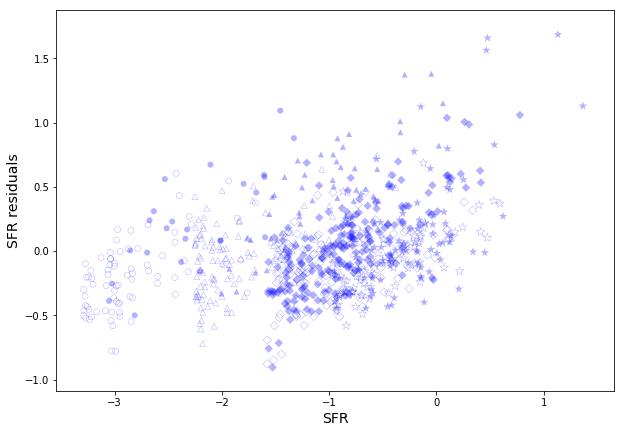

In [104]:
f, ax = plt.subplots()

for ff,mm,ll,size,avg_z in zip(['NB7', 'NB816', 'NB921', 'NB973'], markarr, 
                       ['NB704,NB711', 'NB816', 'NB921', 'NB973'], sizearr, z_arr):
    if 'NB7' in ff:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff[:3] in filts[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff[:3] in filts[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])
    else:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff==filts[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff==filts[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])


    ax.scatter(corr_sfrs[yes_spectra][filt_index_y],
               sfrs_resid[yes_spectra][filt_index_y], marker=mm,
               facecolors='blue', edgecolors='none', alpha=0.3,
               label='z~'+np.str(avg_z)+' ('+ll+')', s=size)

    ax.scatter(corr_sfrs[no_spectra][filt_index_n], 
                    sfrs_resid[no_spectra][filt_index_n],
                    marker=mm, facecolors='none', edgecolors='blue', alpha=0.3, 
                    linewidth=0.5, zorder=3, s=size)

# final touches
ax.set_xlabel('SFR', size=14)
ax.set_ylabel('SFR residuals', size=14)
f.set_size_inches(10,7)